In [1]:
!pip install -r '../input/acledvtwist/requirements.txt'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 KB 601.7 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.2/242.2 KB 1.7 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.1.1
    Uninstalling typing_extensions-4.1.1:
      Successfully uninstalled typing_extensions-4.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
tensorflow 2.6.3 requires absl-py~=0.10, but you have absl-py 1.0.0 which is incompatible.
tensorflow 2.6.3 requires numpy~=1.19.2, but you have numpy 1.21.5 which is incompatible.
tensorflow 2.6.3 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
tensorflow 2.6.3 requires wrapt~=1.12.1, but you have wrapt 1.14.0 which is incompatible.


In [2]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 19.1 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
import pandas as pd
import numpy as np


In [4]:
df=pd.read_excel("../input/africaxls/Africa_1997-2022_Apr08.xlsx")
df.head()

,ISO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,...,ADMIN3,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TIMESTAMP
0,12,ALG1,1,1997-01-01,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Douaouda,36.672,2.789,1,Algeria Watch,Other,5 January: Beheading of 5 citizens in Douaouda...,5,1582579226
1,12,ALG2,2,1997-01-02,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Hassasna,36.133,0.883,1,Algeria Watch,Other,Two citizens were beheaded in Hassasna.,2,1582579226
2,12,ALG3,3,1997-01-03,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Hassi El Abed,34.966,-0.290,1,Algeria Watch,Other,Two citizens were killed in a raid on the vill...,2,1582579226
3,12,ALG4,4,1997-01-04,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Blida,36.469,2.829,1,Algeria Watch,Other,4 January: 16 citizens were murdered in the vi...,16,1582579226
4,12,ALG5,5,1997-01-05,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Douaouda,36.672,2.789,1,Algeria Watch,Other,5 January: Killing of 18 citizens in the Olivi...,18,1582579226


In [167]:
#df = df[:1000]
import warnings
warnings.filterwarnings('ignore' )

In [6]:
news = df.EVENT_TYPE.unique()
news

array(['Violence against civilians', 'Battles',
       'Explosions/Remote violence', 'Protests', 'Strategic developments',
       'Riots'], dtype=object)

In [7]:
keywords = df.SUB_EVENT_TYPE.unique()
keywords

array(['Attack', 'Armed clash', 'Remote explosive/landmine/IED',
       'Shelling/artillery/missile attack', 'Peaceful protest',
       'Change to group/activity', 'Looting/property destruction',
       'Government regains territory', 'Disrupted weapons use',
       'Protest with intervention', 'Violent demonstration',
       'Mob violence', 'Air/drone strike', 'Other', 'Arrests',
       'Excessive force against protesters',
       'Abduction/forced disappearance'], dtype=object)

[1997 1998 1999 2000 2001 2002 2003]


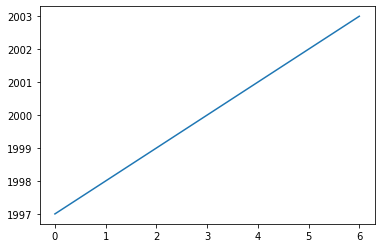

In [8]:
#Is there a gap in the reporting period?
import matplotlib.pyplot as plt
year = df.YEAR.unique()
plt.plot(year)
print(year)

In [9]:
countries=df.COUNTRY.unique()
countries

array(['Algeria'], dtype=object)

# NLP Pre-processing of columns of interest
> Prepare the columns with country, notes, event type and subtype for downstream NLP analysis 

In [10]:
#Tokenization and dpre-processing for nlp
import string
punct = string.punctuation
import spacy
#from spacytextblob.spacytextblob import SpacyTextBlob
from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load('en_core_web_sm')
#nlp.add_pipe("spacytextblob")
stopwords = list(STOP_WORDS)


def text_data_cleaning(sentence):
    '''
    
    Takes a text and pre-processes it for downstream nlp
    input: single document
    output: returns a tokenised document
    
    '''
    #try to remove numbers and months
   
    doc = nlp(sentence)
    
    tokens = []
    for token in doc:
        if token.lemma_ != "-PRON-":
            temp = token.lemma_.lower().strip()
        else:
            temp = token.lower_
        tokens.append(temp)
        

    cleaned_tokens = []
    for token in tokens:
        if token not in stopwords and token not in punct:
            cleaned_tokens.append(token)
    return cleaned_tokens

In [11]:
#create a column for cleaned and tokenised categories
df['SUB_EVENT_TYPE_mod']= df.SUB_EVENT_TYPE.apply(text_data_cleaning)
df.head(1)

,ISO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,...,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TIMESTAMP,SUB_EVENT_TYPE_mod
0,12,ALG1,1,1997-01-01,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,Douaouda,36.672,2.789,1,Algeria Watch,Other,5 January: Beheading of 5 citizens in Douaouda...,5,1582579226,[attack]


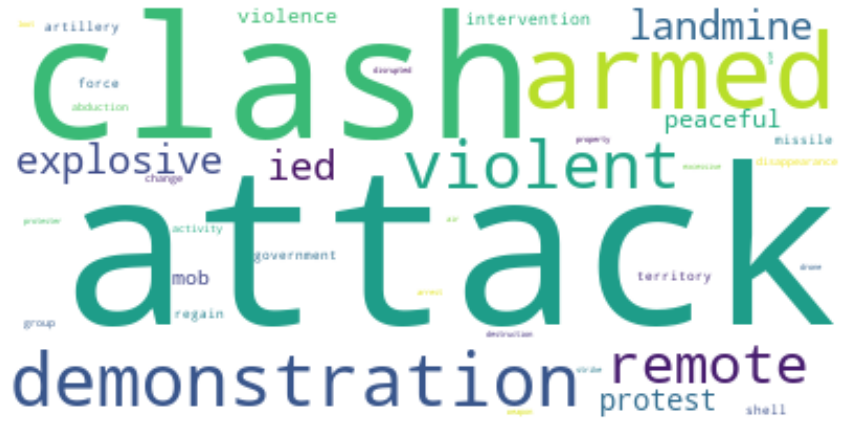

In [12]:
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt

series = pd.Series(np.concatenate(df['SUB_EVENT_TYPE_mod'])).value_counts()[:]
wordcloud = WordCloud(background_color='white').generate_from_frequencies(series)
df.SUB_EVENT_TYPE.head()
plt.figure(figsize=(15,15), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
def text_cleaning(sentence):
    '''
    
    Takes a text and pre-processes it for downstream nlp with numbers and months removed
    input: single document
    output: returns a tokenised document
    
    '''
    #try to remove numbers and months
   
    doc = nlp(sentence)
    unwanted = ['2020','2021','2018','2019','report', 'size', 'area','group','member',
                'january', 'february', 'march', 'april', 'may', 'june', 
                'july', 'august', 'september', 'october','november', 'december']

    tokens = []
    for token in doc:
        if token.lemma_ != "-PRON-":
            temp = token.lemma_.lower().strip()
        else:
            temp = token.lower_
        tokens.append(temp)
        
    #num =re.search('\b([1-9]|[12][0-9]|3[01])\b')
    cleaned_tokens = []
    for token in tokens:
        if token not in stopwords and token not in punct and token not in unwanted and token.isnumeric() ==False:
            cleaned_tokens.append(token)
    return cleaned_tokens

In [14]:
#create a column for cleaned and tokenised categories
#df= df.iloc[:1000]
df['NOTES'] = df['NOTES'].astype(str)
df['NOTES_mod']= df.NOTES.apply(text_cleaning)
df.head(1)

,ISO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,...,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TIMESTAMP,SUB_EVENT_TYPE_mod,NOTES_mod
0,12,ALG1,1,1997-01-01,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,36.672,2.789,1,Algeria Watch,Other,5 January: Beheading of 5 citizens in Douaouda...,5,1582579226,[attack],"[beheading, citizen, douaouda, tipaza]"


In [15]:

# # removes numbers and months
# months = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october','november', 'december']
# # Select o from all the businesses in the data
# #Remove  nested list
# #df['NOTES_mod']= [' '.join([re.sub('[^A-Za-z]', ' ,', line) for line in lists]).strip() for lists in df['NOTES_mod']]
# import re
# pattern = '|'.join(months) 

# #df['NOTES_clean']= df['NOTES_mod'].str.replace(pat=pattern, repl='') #replaces all!
# df['NOTES_clean']= re.sub(pattern,'', df['NOTES_mod']) #try this
# df.head(2) 


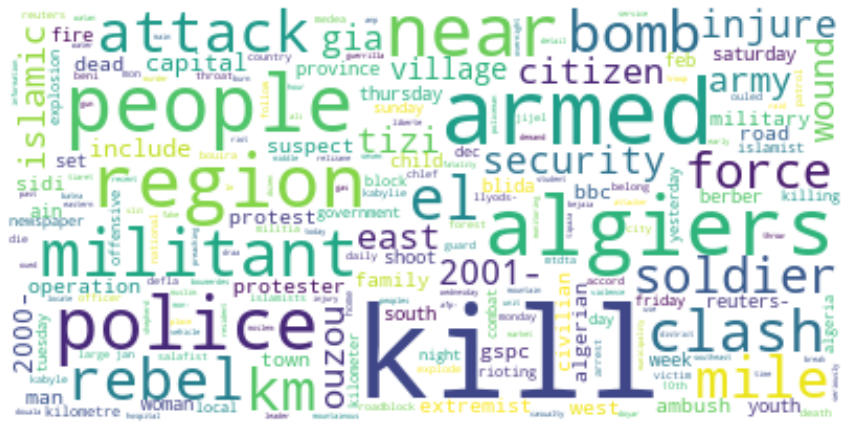

In [16]:
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt

series = pd.Series(np.concatenate(df['NOTES_mod'])).value_counts()[:]
wordcloud = WordCloud(background_color='white').generate_from_frequencies(series)
df.NOTES_mod.head()
plt.figure(figsize=(15,15), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

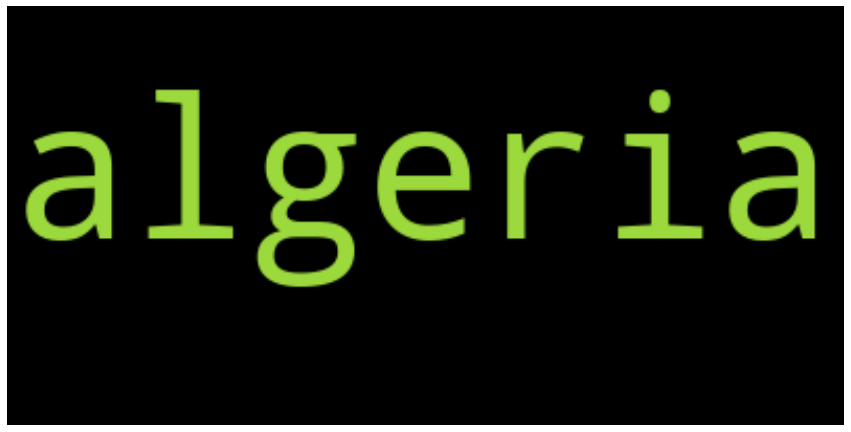

In [17]:
#df['COUNTRY'] = df['COUNTRY'].astype(str)
df['COUNTRY_mod']= df.COUNTRY.apply(text_data_cleaning)

series = pd.Series(np.concatenate(df['COUNTRY_mod'])).value_counts()[:]
wordcloud = WordCloud(background_color='black').generate_from_frequencies(series)
df.COUNTRY_mod.head()
plt.figure(figsize=(15,15), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

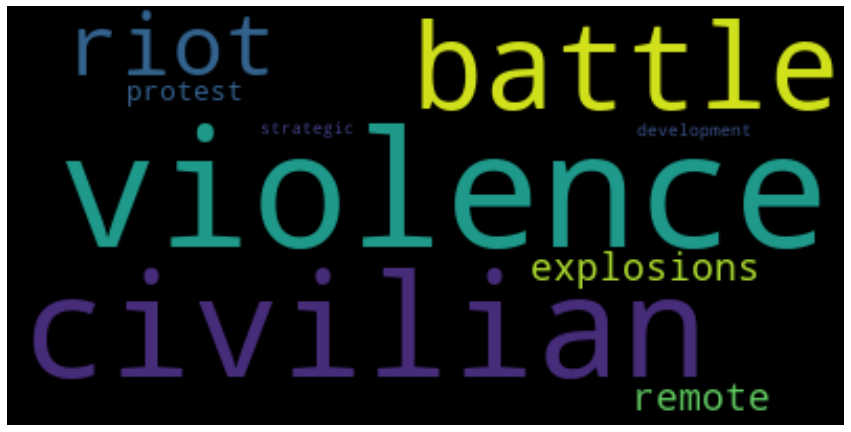

In [18]:
#df['COUNTRY'] = df['COUNTRY'].astype(str)
df['EVENT_TYPE_mod']= df.EVENT_TYPE.apply(text_data_cleaning)

series = pd.Series(np.concatenate(df['EVENT_TYPE_mod'])).value_counts()[:]
wordcloud = WordCloud(background_color='black').generate_from_frequencies(series)
df.EVENT_TYPE_mod.head()
plt.figure(figsize=(15,15), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
df_new = df.filter(['EVENT_DATE','YEAR','COUNTRY','COUNTRY_mod','EVENT_TYPE_mod','SUB_EVENT_TYPE_mod','NOTES_mod','NOTES_clean', 'FATALITIES','LATITUDE','LONGITUDE'],axis=1)
df_new.head(2)

,EVENT_DATE,YEAR,COUNTRY,COUNTRY_mod,EVENT_TYPE_mod,SUB_EVENT_TYPE_mod,NOTES_mod,FATALITIES,LATITUDE,LONGITUDE
0,1997-01-01,1997,Algeria,[algeria],"[violence, civilian]",[attack],"[beheading, citizen, douaouda, tipaza]",5,36.672,2.789
1,1997-01-02,1997,Algeria,[algeria],"[violence, civilian]",[attack],"[citizen, behead, hassasna]",2,36.133,0.883


In [20]:
#df_new = df.filter(['EVENT_DATE','YEAR','COUNTRY','NOTES_mod','FATALITIES','LATITUDE','LONGITUDE'],axis=1)
#df_new.head(2)

In [21]:
df_new.to_csv('African_unrest.csv', index=False)


# Topic Modelling

In [22]:
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

%matplotlib inline


Loading BokehJS ...

In [23]:
datafile = './African_unrest.csv'
raw_data = pd.read_csv(datafile, parse_dates=[0], infer_datetime_format=True)

#reindexed_data = raw_data['NOTES_mod']
#reindexed_data.index = raw_data['EVENT_DATE']

raw_data.head()

,EVENT_DATE,YEAR,COUNTRY,COUNTRY_mod,EVENT_TYPE_mod,SUB_EVENT_TYPE_mod,NOTES_mod,FATALITIES,LATITUDE,LONGITUDE
0,1997-01-01,1997,Algeria,['algeria'],"['violence', 'civilian']",['attack'],"['beheading', 'citizen', 'douaouda', 'tipaza']",5,36.672,2.789
1,1997-01-02,1997,Algeria,['algeria'],"['violence', 'civilian']",['attack'],"['citizen', 'behead', 'hassasna']",2,36.133,0.883
2,1997-01-03,1997,Algeria,['algeria'],"['violence', 'civilian']",['attack'],"['citizen', 'kill', 'raid', 'village', 'hassi'...",2,34.966,-0.290
3,1997-01-04,1997,Algeria,['algeria'],"['violence', 'civilian']",['attack'],"['citizen', 'murder', 'village', 'benachour', ...",16,36.469,2.829
4,1997-01-05,1997,Algeria,['algeria'],"['violence', 'civilian']",['attack'],"['killing', 'citizen', 'oliviers', 'district',...",18,36.672,2.789


In [24]:
#Removes months and numbers from notes
#raw_data['NOTES_clean']=raw_data.NOTES_mod.apply(text_cleaning)
reindexed_data = raw_data['NOTES_mod']
reindexed_data.index =raw_data['EVENT_DATE']
raw_data.head(1)

,EVENT_DATE,YEAR,COUNTRY,COUNTRY_mod,EVENT_TYPE_mod,SUB_EVENT_TYPE_mod,NOTES_mod,FATALITIES,LATITUDE,LONGITUDE
0,1997-01-01,1997,Algeria,['algeria'],"['violence', 'civilian']",['attack'],"['beheading', 'citizen', 'douaouda', 'tipaza']",5,36.672,2.789


In [25]:
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

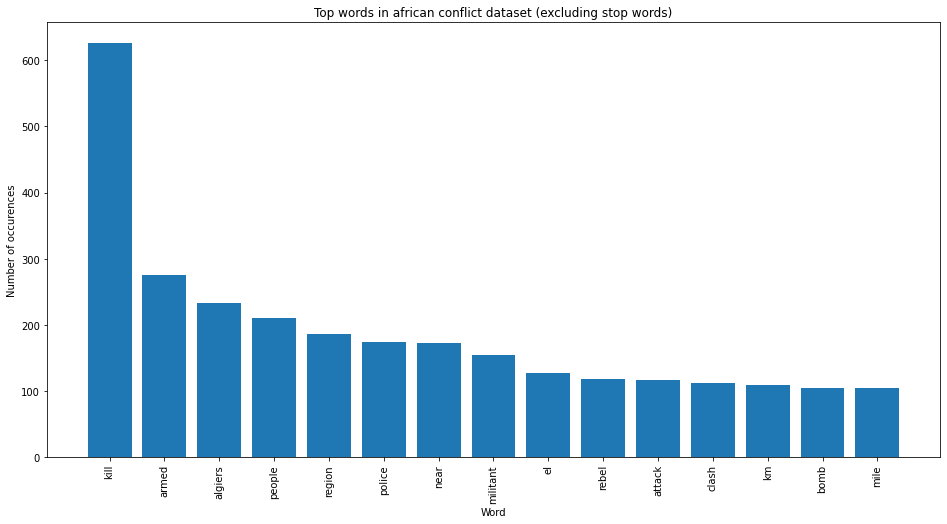

In [26]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=reindexed_data)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in african conflict dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

In [27]:
tagged_headlines = [TextBlob(reindexed_data[i]).pos_tags for i in range(reindexed_data.shape[0])]

In [28]:
tagged_headlines_df = pd.DataFrame({'tags':tagged_headlines})

word_counts = [] 
pos_counts = {}

for headline in tagged_headlines_df[u'tags']:
    word_counts.append(len(headline))
    for tag in headline:
        if tag[1] in pos_counts:
            pos_counts[tag[1]] += 1
        else:
            pos_counts[tag[1]] = 1
            
print('Total number of words: ', np.sum(word_counts))
print('Mean number of words per headline: ', np.mean(word_counts))

Total number of words:  24135
Mean number of words per headline:  24.135


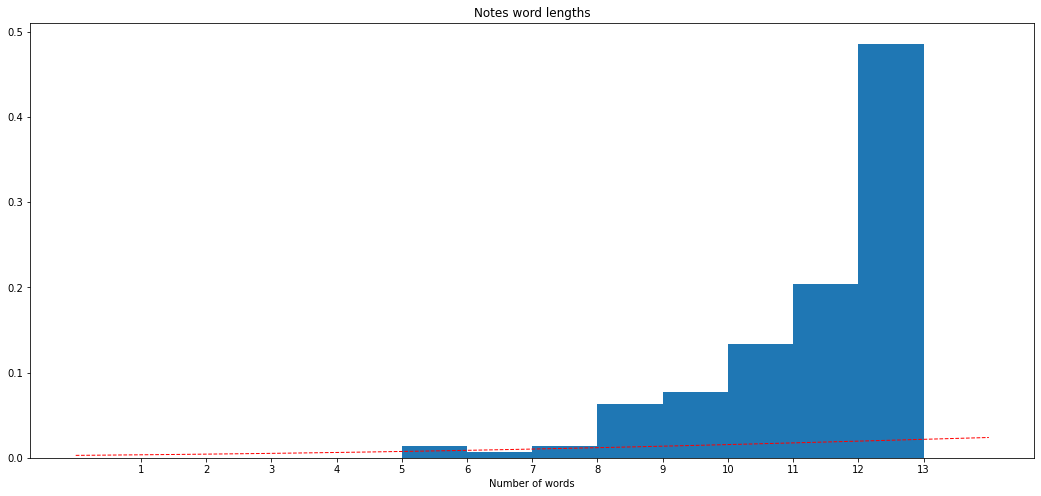

In [29]:
y = stats.norm.pdf(np.linspace(0,14,50), np.mean(word_counts), np.std(word_counts))

fig, ax = plt.subplots(figsize=(18,8))
ax.hist(word_counts, bins=range(1,14), density=True);
ax.plot(np.linspace(0,14,50), y, 'r--', linewidth=1);
ax.set_title('Notes word lengths');
ax.set_xticks(range(1,14));
ax.set_xlabel('Number of words');
plt.show()

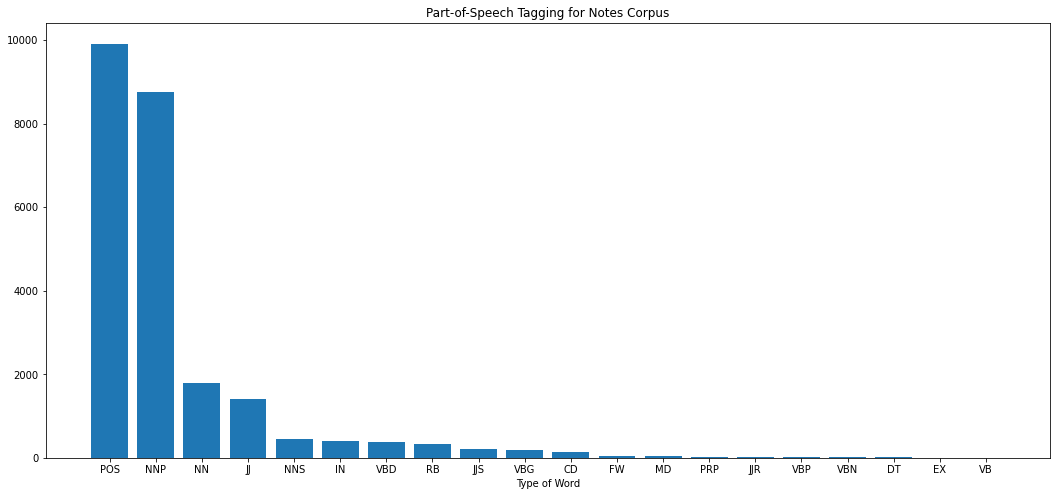

In [30]:
pos_sorted_types = sorted(pos_counts, key=pos_counts.__getitem__, reverse=True)
pos_sorted_counts = sorted(pos_counts.values(), reverse=True)

fig, ax = plt.subplots(figsize=(18,8))
ax.bar(range(len(pos_counts)), pos_sorted_counts);
ax.set_xticks(range(len(pos_counts)));
ax.set_xticklabels(pos_sorted_types);
ax.set_title('Part-of-Speech Tagging for Notes Corpus');
ax.set_xlabel('Type of Word');

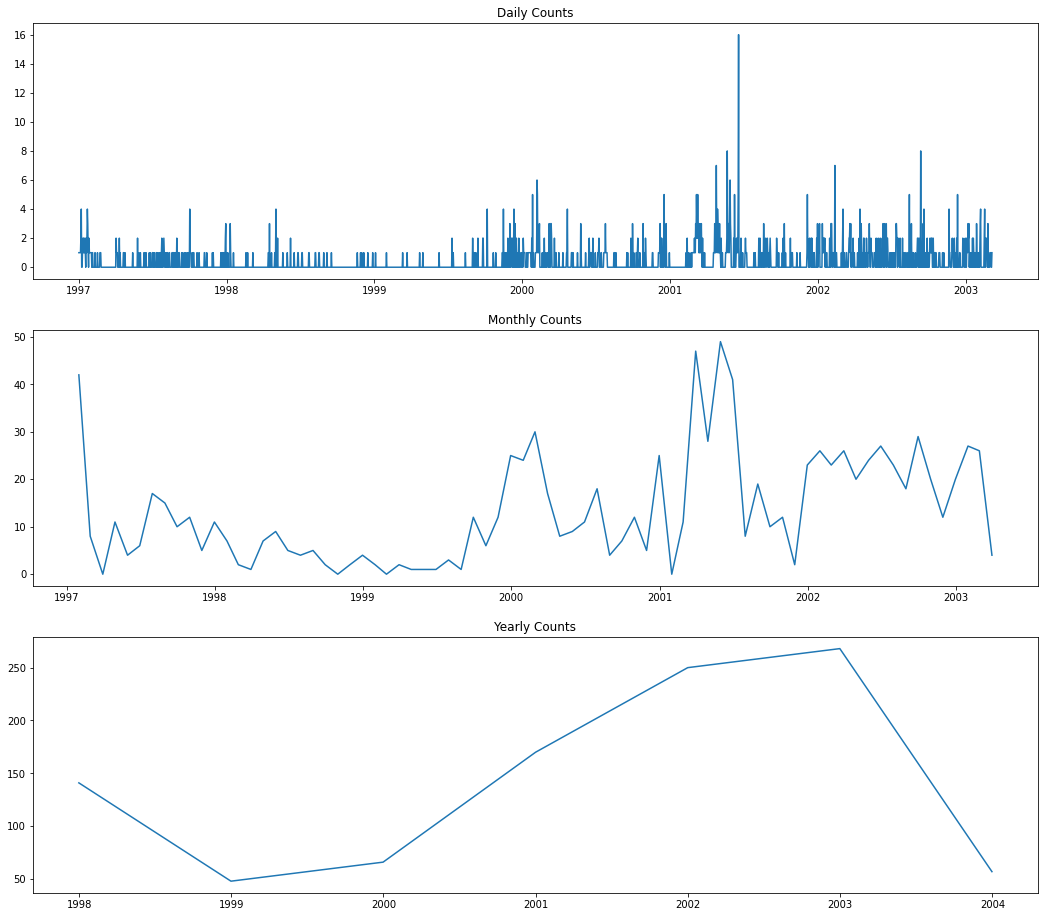

In [31]:
monthly_counts = reindexed_data.resample('M').count()
yearly_counts = reindexed_data.resample('A').count()
daily_counts = reindexed_data.resample('D').count()

fig, ax = plt.subplots(3, figsize=(18,16))
ax[0].plot(daily_counts);
ax[0].set_title('Daily Counts');
ax[1].plot(monthly_counts);
ax[1].set_title('Monthly Counts');
ax[2].plot(yearly_counts);
ax[2].set_title('Yearly Counts');
plt.show()

In [33]:
small_count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
small_text_sample = reindexed_data.sample(n=10000, random_state=0, replace=True).values

print('Notes before vectorization: {}'.format(small_text_sample[123]))

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

print('Notes after vectorization: \n{}'.format(small_document_term_matrix[123]))

Notes before vectorization: ['rebel', 'kill', 'army', 'retaliatory', 'attack', 'early', 'week']
Notes after vectorization: 
  (0, 1112)	1
  (0, 195)	1
  (0, 1616)	1
  (0, 213)	1
  (0, 2074)	1
  (0, 689)	1
  (0, 1671)	1


In [34]:
n_topics = 6

In [35]:
lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', 
                                          random_state=0, verbose=0)
lda_topic_matrix = lda_model.fit_transform(small_document_term_matrix)

In [36]:
# Define helper functions
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [37]:
# Define helper functions
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [38]:
lda_keys = get_keys(lda_topic_matrix)
lda_categories, lda_counts = keys_to_counts(lda_keys)

In [39]:
top_n_words_lda = get_top_n_words(10, lda_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lda)):
    print("Topic {}: ".format(i+1), top_n_words_lda[i])

Topic 1:  kill bomb people injure road tizi attack ouzou 2001 armed
Topic 2:  kill armed citizen people child near family include woman village
Topic 3:  police clash protester region people protest kill berber youth rioting
Topic 4:  kill algiers mile militant el near region km rebel armed
Topic 5:  kill algiers gspc armed army islamic combat near soldier mile
Topic 6:  kill militant algiers 2000 security force armed rebel near gia


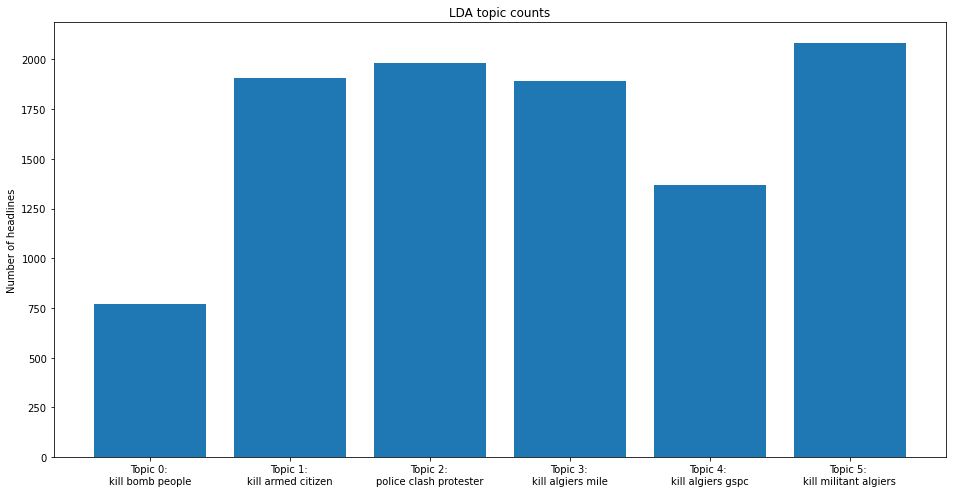

In [40]:
top_3_words = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lda_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lda_categories, lda_counts);
ax.set_xticks(lda_categories);
ax.set_xticklabels(labels);
ax.set_title('LDA topic counts');
ax.set_ylabel('Number of headlines');


In [168]:
tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.009s...
[t-SNE] Computed neighbors for 10000 samples in 0.505s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.704063
[t-SNE] KL divergence after 2000 iterations: -0.147063


In [43]:
# Define helper functions
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])    
        
        articles_in_that_topic = np.vstack(articles_in_that_topic)
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors

In [44]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

In [45]:
top_5_words_lda = get_top_n_words(5, lda_keys, small_document_term_matrix, small_count_vectorizer)
lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys, tsne_lda_vectors)

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])

for t in range(n_topics):
    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1], 
                  text=top_5_words_lda[t], text_color=colormap[t])
    plot.add_layout(label)

show(plot)

In [ ]:
big_sample_size = 276490

big_count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
big_text_sample = reindexed_data.sample(n=big_sample_size, random_state=0).values
big_document_term_matrix = big_count_vectorizer.fit_transform(big_text_sample)

big_lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online')
big_lda_model.fit(big_document_term_matrix);

In [ ]:
 yearly_data

In [257]:
yearly_data = []
for i in range(1997,2022+1):
    yearly_data.append(reindexed_data['{}'.format(i)].values)

yearly_topic_matrices = []
for year in yearly_data:
    document_term_matrix = big_count_vectorizer.transform(year)
    topic_matrix = big_lda_model.transform(document_term_matrix)
    yearly_topic_matrices.append(topic_matrix)

yearly_keys = []
for topic_matrix in yearly_topic_matrices:
    yearly_keys.append(get_keys(topic_matrix))
    
yearly_counts = []
for keys in yearly_keys:
    categories, counts = keys_to_counts(keys)
    yearly_counts.append(counts)

yearly_topic_counts = pd.DataFrame(np.array(yearly_counts), index=range(1997,2022+1))
yearly_topic_counts.columns = ['Topic {}'.format(i+1) for i in range(n_topics)]


yearly_conflict = pd.DataFrame(np.array(yearly_data), index=range(1997,2022+1))

print(yearly_topic_counts)

KeyError: '2004'

In [ ]:
fig, ax = plt.subplots(figsize=(14,10))
sb.heatmap(yearly_topic_counts, cmap="YlGnBu", ax=ax);
plt.show()

## Filter by year and country?

In [ ]:
df= pd.read_csv('./African_unrest.csv')
df.head(1)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4a027971-fa43-4fea-9cbd-70262a03c740' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

# Does economic status affect theme's or types of protests?

In [52]:
# Import economic data
economy_df=pd.read_csv('../input/economics/Economics.csv', engine='python')
economy_df.head(1)

,Country Name,Country Code,Indicator Name,1960,1961,1962,1963,1964,1965,1966,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,GDP growth (annual %),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.446055,-1.369863,4.198232,0.3,5.700001,2.1,1.999999,NaN,NaN,NaN


In [54]:
df_economy = pd.melt(economy_df, id_vars='Country Name', value_vars=['1997', '1998','1999','2000',\
                                                                     '2001','2002','2003','2004','2005',\
                                                                     '2006','2007','2008','2009','2010',\
                                                                     '2011','2012','2013','2014','2015',\
                                                                     '2016','2017','2018','2019','2020'],\
                     var_name ='Year', value_name ='GDP_change'
                     
                    )

df_economy.to_csv('eco.csv')
df_economy.head(1)


,Country Name,Year,GDP_change
0,Aruba,1997,7.046874


In [55]:
del(df_economy) #delete to save  space
df_economy=pd.read_csv('/kaggle/working/eco.csv')

In [47]:
data = pd.read_csv("./African_unrest.csv")
#data=pd.read_excel("../input/africaxls/Africa_1997-2022_Apr08.xlsx")
data.head(1)

,EVENT_DATE,YEAR,COUNTRY,COUNTRY_mod,EVENT_TYPE_mod,SUB_EVENT_TYPE_mod,NOTES_mod,FATALITIES,LATITUDE,LONGITUDE
0,1997-01-01,1997,Algeria,['algeria'],"['violence', 'civilian']",['attack'],"['beheading', 'citizen', 'douaouda', 'tipaza']",5,36.672,2.789


In [138]:
#restructure data by year
yearly_summary = (data.groupby(["YEAR", "COUNTRY"])['NOTES_mod']
           .apply(', '.join)
           .reset_index())
yearly_summary.columns.name = None
yearly_summary.head()

,YEAR,COUNTRY,NOTES_mod
0,1997,Algeria,"['beheading', 'citizen', 'douaouda', 'tipaza']..."
1,1998,Algeria,"['pittsburgh', 'post', 'gazette', 'seventy', '..."
2,1999,Algeria,"['times', 'picayune-', 'algeria', 'security', ..."
3,2000,Algeria,"['jan', 'reuters', 'radical', 'moslem', 'rebel..."
4,2001,Algeria,"['11th', 'feb', '2001-', 'armed', 'assiliant',..."


In [172]:
#select only-SubSaharan countries form economy
import re

pattern ='|'.join(data.COUNTRY.unique())

df_economy['Countries']= df_economy['Country Name'].str.contains(pat=pattern,flags=re.IGNORECASE, regex=True)

economy_summary = df_economy[(df_economy.Countries == True)]
print(economy_summary.shape)
economy_summary.head()

(24, 5)


,Unnamed: 0,Country Name,Year,GDP_change,Countries
60,60,Algeria,1997,1.100000,True
326,326,Algeria,1998,5.100004,True
592,592,Algeria,1999,3.200002,True
858,858,Algeria,2000,3.800000,True
1124,1124,Algeria,2001,3.000000,True


In [178]:
#join the two data frames on country
df_yearly=yearly_summary.merge(economy_summary, left_on= 'YEAR', right_on='Year', how='left', copy=True)
df_yearly.head()
#df_yearly= df_yearly.dropna(axis=1)

,YEAR,COUNTRY,NOTES_mod,Unnamed: 0,Country Name,Year,GDP_change,Countries
0,1997,Algeria,"['beheading', 'citizen', 'douaouda', 'tipaza']...",60,Algeria,1997,1.100000,True
1,1998,Algeria,"['pittsburgh', 'post', 'gazette', 'seventy', '...",326,Algeria,1998,5.100004,True
2,1999,Algeria,"['times', 'picayune-', 'algeria', 'security', ...",592,Algeria,1999,3.200002,True
3,2000,Algeria,"['jan', 'reuters', 'radical', 'moslem', 'rebel...",858,Algeria,2000,3.800000,True
4,2001,Algeria,"['11th', 'feb', '2001-', 'armed', 'assiliant',...",1124,Algeria,2001,3.000000,True


In [188]:
df_yearly = df_yearly.set_index('YEAR')
df_yearly.head()

,COUNTRY,NOTES_mod,Unnamed: 0,Country Name,Year,GDP_change,Countries
YEAR,,,,,,,
1997,Algeria,"['beheading', 'citizen', 'douaouda', 'tipaza']...",60,Algeria,1997,1.100000,True
1998,Algeria,"['pittsburgh', 'post', 'gazette', 'seventy', '...",326,Algeria,1998,5.100004,True
1999,Algeria,"['times', 'picayune-', 'algeria', 'security', ...",592,Algeria,1999,3.200002,True
2000,Algeria,"['jan', 'reuters', 'radical', 'moslem', 'rebel...",858,Algeria,2000,3.800000,True
2001,Algeria,"['11th', 'feb', '2001-', 'armed', 'assiliant',...",1124,Algeria,2001,3.000000,True


In [180]:
topics = []

def analyse(text):
    #token_text = text_data_cleaning(text)
    #token_text2 = [' '.join(token_text)]
    
    count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
    #text = token_text2

    
    term_matrix = count_vectorizer.fit_transform(text)

   
    
    lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', 
                                          random_state=0, verbose=0)
    lda_topic_matrix = lda_model.fit_transform(term_matrix)
    
    lda_keys = get_keys(lda_topic_matrix)
    lda_categories, lda_counts = keys_to_counts(lda_keys)
    
    top_n_words_lda = get_top_n_words(10, lda_keys, term_matrix, count_vectorizer)

    for i in range(len(top_n_words_lda)):
        print("Topic {}: ".format(i+1), top_n_words_lda[i])
        
    top_3_words = get_top_n_words(3, lda_keys, term_matrix, count_vectorizer)
    labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lda_categories]

    fig, ax = plt.subplots(figsize=(16,8))
    ax.bar(lda_categories, lda_counts);
    ax.set_xticks(lda_categories);
    ax.set_xticklabels(labels);
    ax.set_title('LDA topic counts');
    ax.set_ylabel('Number of headlines');

    
    return top_3_words
 


1997
Topic 1:  village child include doyar accord locate ain btni set chebli
Topic 2:  woman man region injure militant mutilate tiaret horrible sanda tablat
Topic 3:  citizen people blida family dead murder militia defla douaouda et
Topic 4:  kill mtdta oule farm haouch omaria slimane ali werekille operation
Topic 5:  bomb el assassinate hospital boufarik wound class work girl moussa
Topic 6:  armed near explosion algier sidi tipaza military away larbag ann
['village child include', 'woman man region', 'citizen people blida', 'kill mtdta oule', 'bomb el assassinate', 'armed near explosion']
1998
Topic 1:  algier algerian algeria pittsburgh casualty shoot information el gia ramadan
Topic 2:  kill south troop newspaper news west east government al info
Topic 3:  bomb armed attack near globe militant civilian village security rip
Topic 4:  rebel muslim mile lloyds wound market villager western include region
Topic 5:  capital mail islamic dead sidi injure throat town force gazette
Topic 

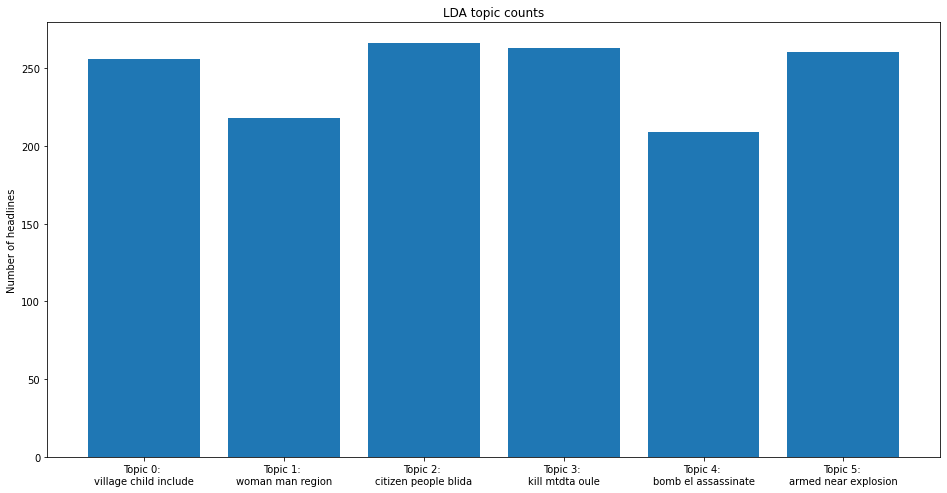

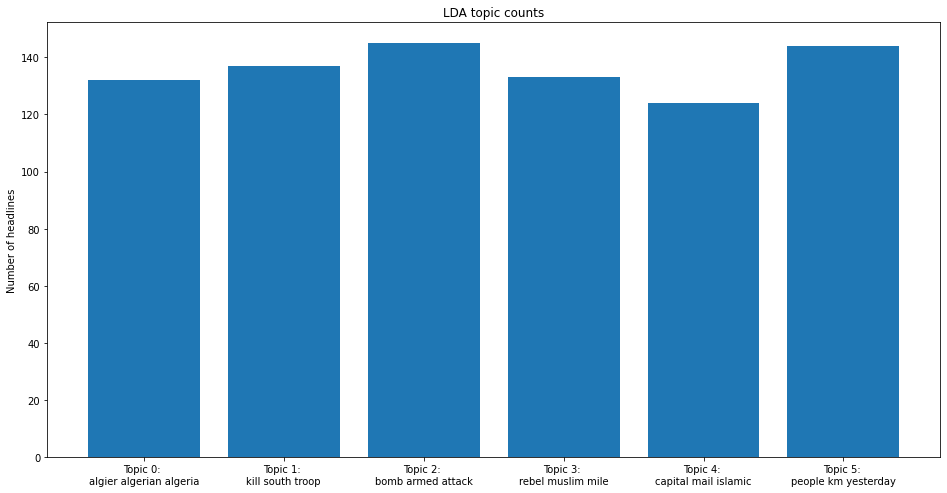

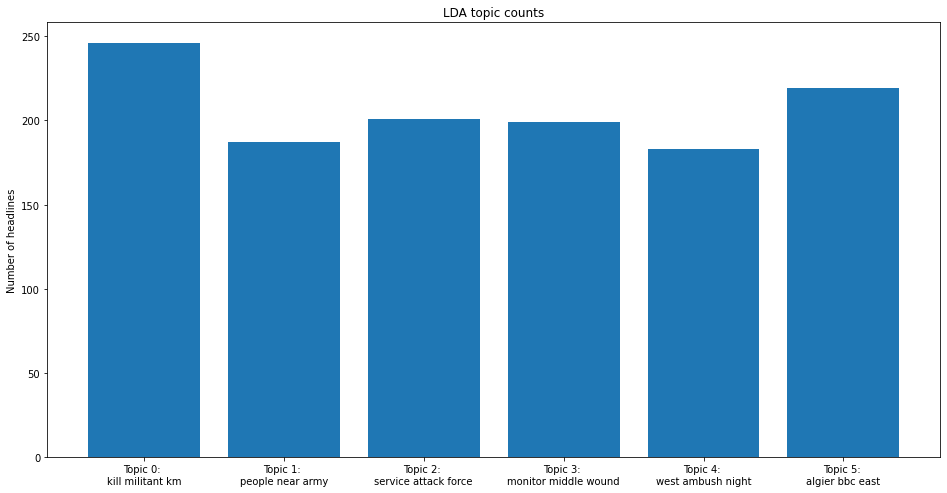

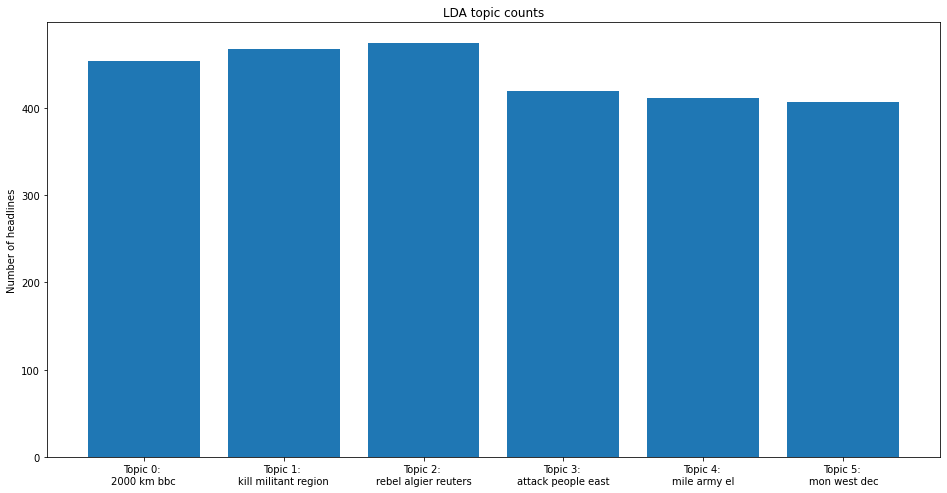

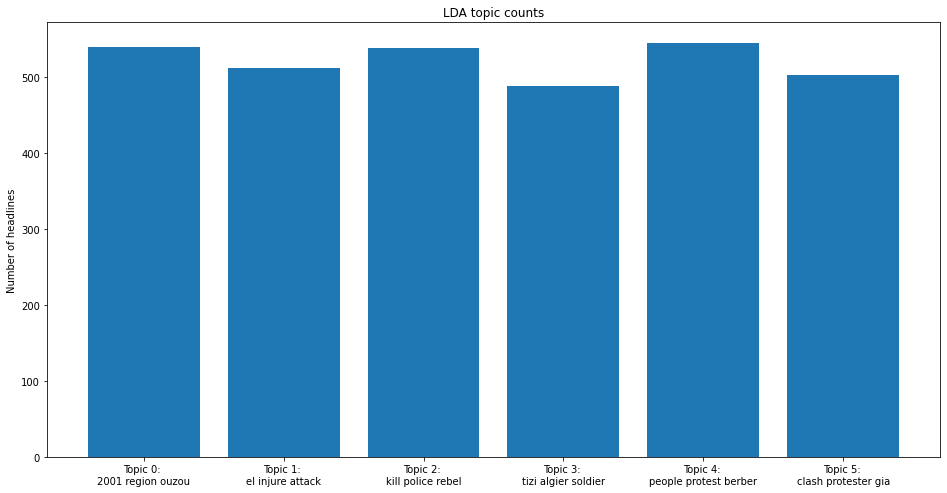

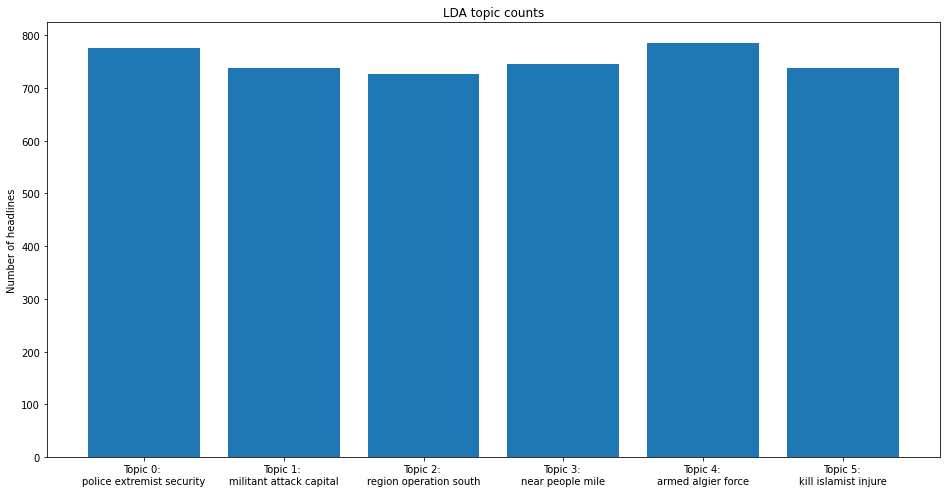

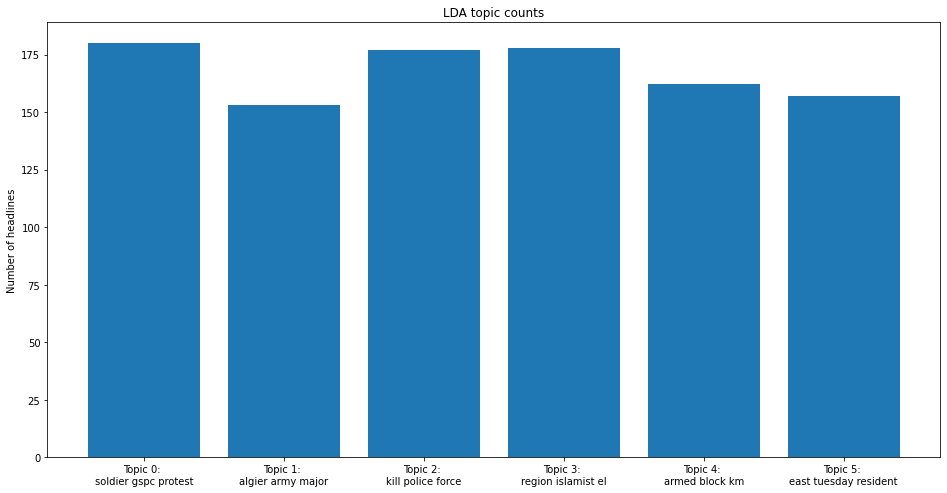

In [195]:
for year in df_yearly['Year']:
    print(year)
    text = df_yearly['NOTES_mod'].loc[[year]]
    topics = analyse(text_data_cleaning(','.join(text)))
    print(topics)
    #df_yearly['subs'] = df_yearly['NOTES_mod'].loc[[year]].apply(analyse(text_data_cleaning(' '.join(text))))